#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
import wandb
wandb.login(key = "c6514b6a6bb47360dcd55395a14f4ad95e83ef2c")
wandb.init(project='DistanceClassificationMLPR-Lab5')

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /Users/ananyasingla/.netrc
wandb: Currently logged in as: ananya-singla-ug23 (ananya-singla-ug23-plaksha) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


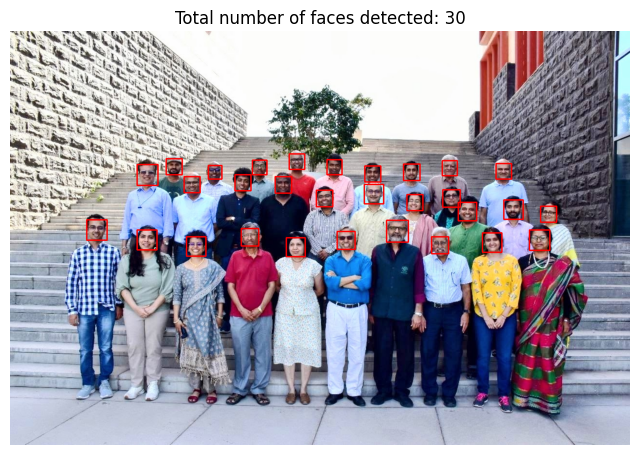

In [13]:
import cv2
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread("Plaksha_Faculty.jpg")
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load Haar cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Detect faces
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25, 25), maxSize=(50, 50))

# Create a copy of the original image to draw rectangles
image_with_faces = image_rgb.copy()

# Draw rectangles around detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(image_with_faces, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Red rectangle

# Display the image with detections
plt.figure(figsize=(8, 6))
plt.imshow(image_with_faces)
plt.title(f"Total number of faces detected: {len(faces_rect)}")
plt.axis("off")
plt.show()


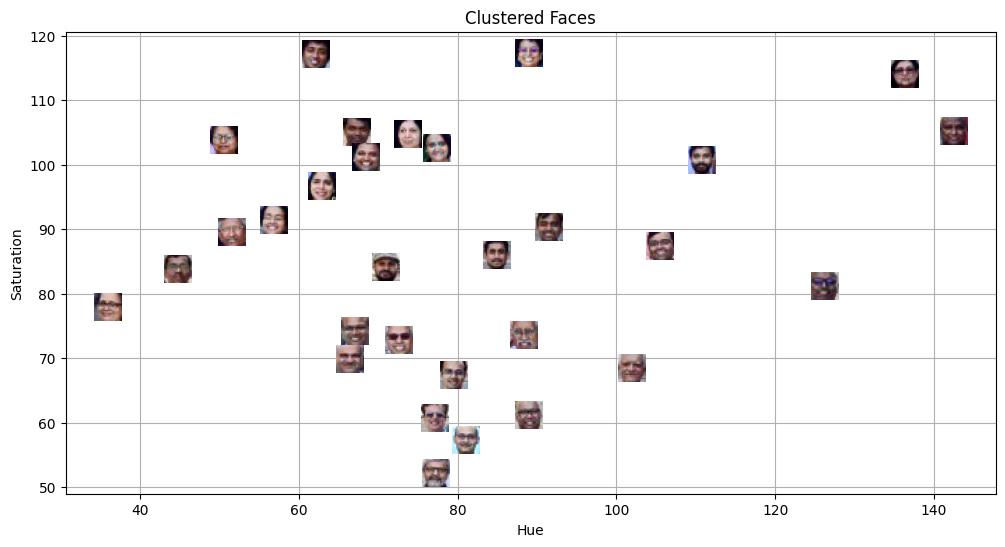

In [14]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(hue_saturation)
#centroids = kmeans.cluster_centers_
#labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    
plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Clustered Faces')
plt.grid(True)
plt.show()
## Put x label
## Put y label
## Put title
## Put grid
## show the plot

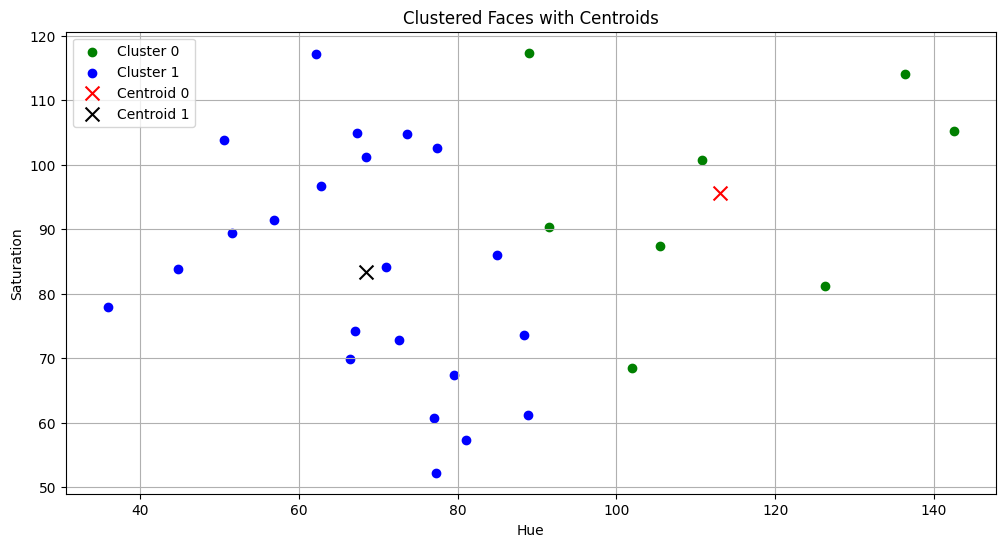

In [15]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0')

cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], c='red', label='Centroid 0', marker='x', s=100)
plt.scatter(centroid_1[0], centroid_1[1], c='black', label='Centroid 1', marker='x', s=100)

## Put x label
plt.xlabel('Hue')
## Put y label
plt.ylabel('Saturation')
## Put title
plt.title('Clustered Faces with Centroids')
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
## Show the plot
plt.show()


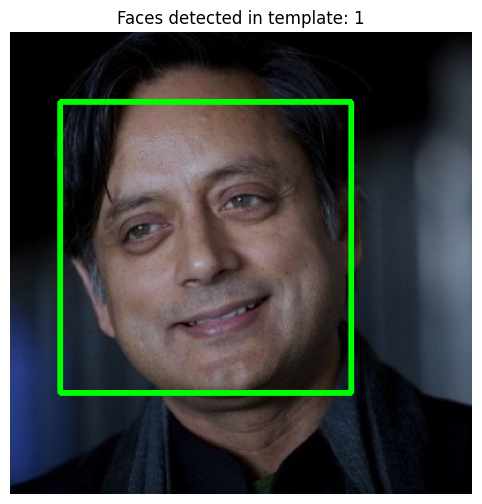

In [23]:
# Read the template image
template_img = cv2.imread("Dr_Shashi_Tharoor.jpg")
template_img_rgb = cv2.cvtColor(template_img, cv2.COLOR_BGR2RGB)

# Detect face in the template image after converting it to gray

# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
# Detect face in the template image after converting it to gray
template_faces = face_cascade.detectMultiScale(template_gray, scaleFactor=1.1, minNeighbors=3, minSize=(30, 30))

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)  # Green rectangle

# Display the template image with detections
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(template_img, cv2.COLOR_BGR2RGB))  # Convert for correct color display
plt.title(f"Faces detected in template: {len(template_faces)}")
plt.axis("off")
plt.show()


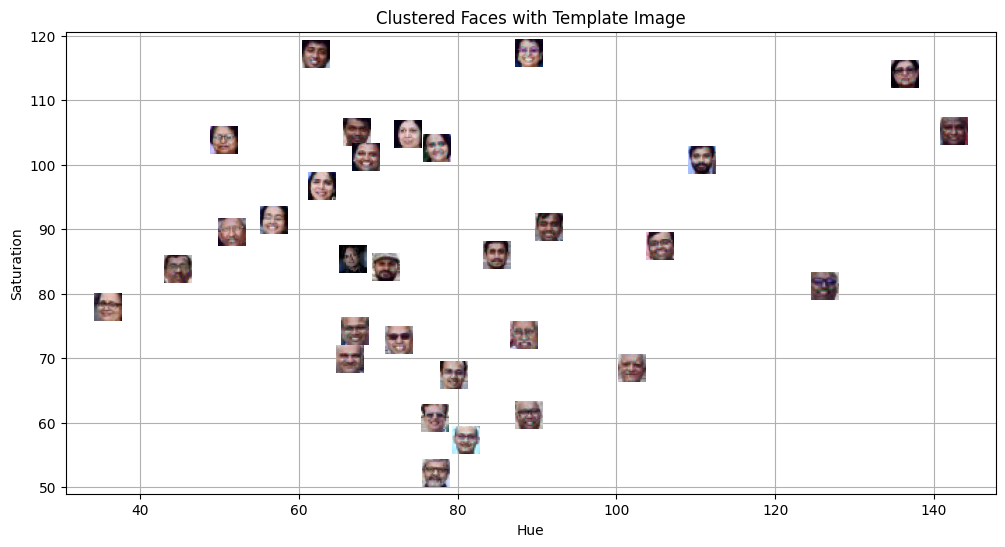

In [24]:
# Convert the template image to HSV color space and store it in template_hsv
template_img = cv2.imread("Dr_Shashi_Tharoor.jpg")
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

# Put x label
plt.xlabel('Hue')
# Put y label
plt.ylabel('Saturation')
# Put title
plt.title('Clustered Faces with Template Image')
# Add grid
plt.grid(True)
# Show plot
plt.show()

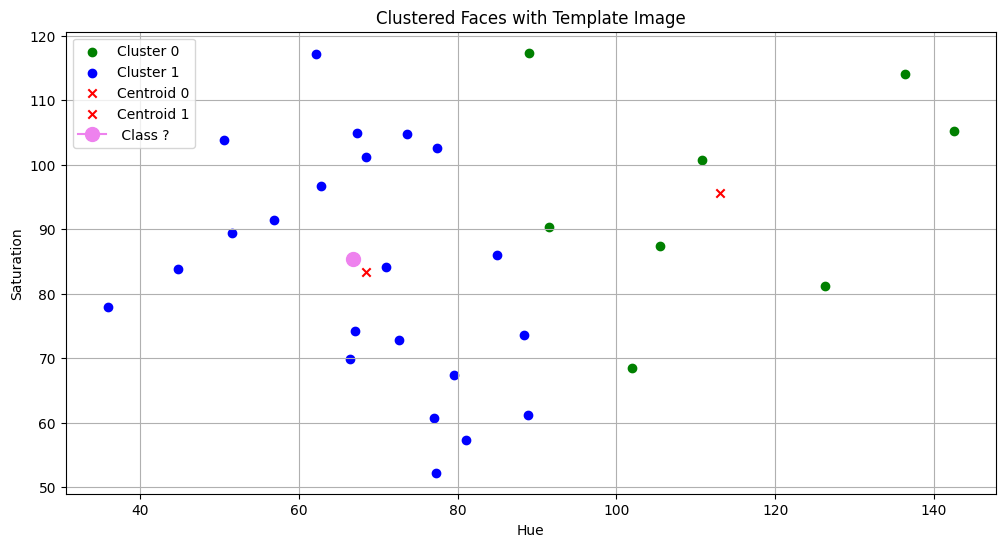

In [18]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1')

template_hue = np.mean(template_hsv[:, :, 0])

# Calculate and plot centroids for both the clusters
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]
plt.scatter(centroid_0[0], centroid_0[1], marker='x', c='red', label='Centroid 0') ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], marker='x', c='red', label='Centroid 1')  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

# Put x label
plt.xlabel('Hue')
# Put y label
plt.ylabel('Saturation')
# Put title
plt.title('Clustered Faces with Template Image')
# Add a legend
plt.legend()
# Add grid
plt.grid(True)
# Show the plot
plt.show()
                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


## Distance-Based Classification Algorithms  

#### 1. What are the common distance metrics used in distance-based classification algorithms?  
a. Euclidean distance  
b. Manhattan distance  
c. Minkowski distance  
d. Mahalanobis distance  
e. Cosine distance  
f. Chebyshev distance  

#### 2. What are some real-world applications of distance-based classification algorithms?  
Recommendation systems in e-commerce and streaming platforms, where user-item similarity is calculated using distance metrics for personalized content suggestions.  

#### 3. Explain various distance metrics.  
The Minkowski distance is given by:  

$$
D(X, Y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}
$$  

- If **p = 1**, Manhattan Distance  
- If **p = 2**, Euclidean Distance  
- If **p = ∞**, Chebyshev Distance  

#### 4. What is the role of cross-validation in model performance?  
It is training the model on some and testing it on others iteratively, providing a more reliable estimate of how the model will perform on unseen data, helping to detect overfitting or underfitting.  

#### 5. Explain variance and bias in terms of KNN?  
- **Bias**: A high bias in KNN can occur when the value of **k** is large.  
- **Variance**: Algorithm's sensitivity to fluctuations in the training data.  